Coronavirus disease (COVID-19) is an infectious disease caused by the SARS-CoV-2 virus.

Most people infected with the virus will experience mild to moderate respiratory illness and recover without requiring special treatment. However, some will become seriously ill and require medical attention. Older people and those with underlying medical conditions like cardiovascular disease, diabetes, chronic respiratory disease, or cancer are more likely to develop serious illness. Anyone can get sick with COVID-19 and become seriously ill or die at any age. 

In 2021, the impact of COVID-19 is mitigated with vaccines, such as those from Moderna, Pfizer-BioNTech, and Johnson-Johnson. In the U.S., different states have different levels of vaccination against COVID-19 that are potentially correlated with other characteristics, such as political affiliation, level of education, COVID case severity, and demographics. In this notebook, we intend to explore the strength of the correlation between vaccination rates and these factors, eventually developing a naive statistical predictor for vaccination rates.

**Importing python libraries and datasets**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!rm -R .* *
!git clone https://github.com/Casper-Guo/MDST-Covid-Vaccination .

rm: refusing to remove '.' or '..' directory: skipping '.'
rm: refusing to remove '.' or '..' directory: skipping '..'
Cloning into '.'...
remote: Enumerating objects: 106, done.
remote: Counting objects: 100% (106/106), done.
remote: Compressing objects: 100% (94/94), done.
remote: Total 106 (delta 53), reused 21 (delta 10), pack-reused 0
Receiving objects: 100% (106/106), 170.68 KiB | 6.83 MiB/s, done.
Resolving deltas: 100% (53/53), done.


In [ ]:
from google.colab import drive
drive.flush_and_unmount()

Drive not mounted, so nothing to flush and unmount.


In [ ]:
link_mask_usage = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/mask-use/mask-use-by-county.csv"
df_mask_usage = pd.read_csv(link_mask_usage)

link_mask_usage_state = "https://raw.githubusercontent.com/Casper-Guo/MDST-Covid-Vaccination/main/covid_mask_usage_by_state.csv"
df_mask_usage_state = pd.read_csv(link_mask_usage_state)

link_education = "https://raw.githubusercontent.com/Casper-Guo/MDST-Covid-Vaccination/main/education_clean.csv"
df_education = pd.read_csv(link_education)

link_coverage = "https://raw.githubusercontent.com/Casper-Guo/MDST-Covid-Vaccination/main/health%20coverage%20by%20state.csv"
df_coverage = pd.read_csv(link_coverage)

link_median_income = "https://raw.githubusercontent.com/Casper-Guo/MDST-Covid-Vaccination/main/medianIncomeByState2019.csv"
df_median_income = pd.read_csv(link_median_income)

link_race_ethnicity = "https://github.com/Casper-Guo/MDST-Covid-Vaccination/blob/main/percent_vaccinated_race_ethnicity.xlsx?raw=true"
df_race_ethnicity = pd.read_excel(link_race_ethnicity)

link_political_ident = 'https://raw.githubusercontent.com/Casper-Guo/MDST-Covid-Vaccination/main/state-political-identification.csv'
df_political_ident = pd.read_csv(link_political_ident)

In [ ]:
from data.medianIncome import state_median_income

**Organizing Data**

In [ ]:
states_abbreviations = {"AL":"ALABAMA",
             "AK":"ALASKA",
             "AS":"AMERICAN SAMOA",
             "AZ":"ARIZONA",
             "AR":"ARKANSAS",
             "CA":"CALIFORNIA",
             "CO":"COLORADO",
             "CT":"CONNECTICUT",
             "DE":"DELAWARE",
             "DC":"DISTRICT OF COLUMBIA",
             "FL":"FLORIDA",
             "GA":"GEORGIA",
             "GU":"GUAM",
             "HI":"HAWAII",
             "ID":"IDAHO",
             "IL":"ILLINOIS",
             "IN":"INDIANA",
             "IA":"IOWA",
             "KS":"KANSAS",
             "KY":"KENTUCKY",
             "LA":"LOUISANA",
             "ME":"MAINE",
             "MD":"MARYLAND",
             "MA":"MASSECHUESETTS",
             "MI":"MICHIGAN",
             "MN":"MINNESOTA",
             "MS":"MISSISSIPPI",
             "MO":"MISSOURI",
             "MT":"MONTANA",
             "NE":"NEBRASKA",
             "NV":"NEVADA",
             "NH":"NEW HAMPSHIRE",
             "NJ":"NEW JERSEY",
             "NM":"NEW MEXICO",
             "NY":"NEW YORK",
             "NC":"NORTH CAROLINA",
             "ND":"NORTH DAKOTA",
             "MP":"N MARIANA ISLAND",
             "OH":"OHIO",
             "OK":"OKLAHOMA",
             "OR":"OREGON",
             "PA":"PENNSYLVANIA",
             "PR":'PUERTO RICO',
             "RI":"RHODE ISLAND",
             "SC":"SOUTH CAROLINA",
             "SD":"SOUTH DAKOTA",
             "TN":"TENNESSEE",
             "TX":"TEXAS",
             "UT":"UTAH",
             "VT":"VERMONT",
             "VA":"VIRGINIA",
             "VI":"VIRGIN ISLANDS",
             "WA":"WASHINGTON",
             "WV":"WEST VIRGINIA",
             "WI":"WISCONSIN",
             "WY":"WYOMING"}

print(len(states_abbreviations))

states_fips = {"01":"ALABAMA",
        "02":"ALASKA",
        "60":"AMERICAN SAMOA",
        "04":"ARIZONA",
        "05":"ARKANSAS",
        "06":"CALIFORNIA",
        "08":"COLORADO",
        "09":"CONNECTICUT",
        "10":"DELAWARE",
        "11":"DISTRICT OF COLUMBIA",
        "12":"FLORIDA",
        "13":"GEORGIA",
        "66":"GUAM",
        "15":"HAWAII",
        "16":"IDAHO",
        "17":"ILLINOIS",
        "18":"INDIANA",
        "19":"IOWA",
        "20":"KANSAS",
        "21":"KENTUCKY",
        "22":"LOUISANA",
        "23":"MAINE",
        "24":"MARYLAND",
        "25":"MASSECHUESETTS",
        "26":"MICHIGAN",
        "27":"MINNESOTA",
        "28":"MISSISSIPPI",
        "29":"MISSOURI",
        "30":"MONTANA",
        "31":"NEBRASKA",
        "32":"NEVADA",
        "33":"NEW HAMPSHIRE",
        "34":"NEW JERSEY",
        "35":"NEW MEXICO",
        "36":"NEW YORK",
        "37":"NORTH CAROLINA",
        "38":"NORTH DAKOTA",
        "69":"N MARIANA ISLAND",
        "39":"OHIO",
        "40":"OKLAHOMA",
        "41":"OREGON",
        "42":"PENNSYLVANIA",
        "72":'PUERTO RICO',
        "44":"RHODE ISLAND",
        "45":"SOUTH CAROLINA",
        "46":"SOUTH DAKOTA",
        "47":"TENNESSEE",
        "48":"TEXAS",
        "49":"UTAH",
        "50":"VERMONT",
        "51":"VIRGINIA",
        "78":"VIRGIN ISLANDS",
        "53":"WASHINGTON",
        "54":"WEST VIRGINIA",
        "55":"WISCONSIN",
        "56":"WYOMING"}
  
#print(len(state_fips))

56


In [ ]:
# return full name of the state/territory
# given its abbreviation regardless of capitalization
# if not found, return NOT FOUND
def abb_to_name(abbreviation):
  return states_abbreviations.get(abbreviation.upper(), "NOT FOUND")

In [ ]:
# return full name of the state/territory
# given its FIPS code (both string type and int type is fine)
# if not found, return NOT FOUND
def fips_to_name(fips):
  return states_fips.get(str(fips), "NOT FOUND")

In [ ]:
# Process the county FIPS code and separate it into county and state
# Group the data by state and print the median of each category

df_mask_usage["COUNTY"] = df_mask_usage["COUNTYFP"]
df_mask_usage["COUNTY"] = df_mask_usage["COUNTY"].map(lambda x: str(x)[-3:])
df_mask_usage["STATE"] = df_mask_usage["COUNTYFP"]
df_mask_usage["STATE"] = df_mask_usage["STATE"].map(lambda x: "0" + str(x)[0] if len(str(x)) == 4 else str(x)[:2])

df_mask_usage.drop(labels = "COUNTYFP", axis = 1, inplace = True)
# print(df_mask_usage.groupby('STATE').median())

In [ ]:
df_mask_usage_state.drop(df_mask_usage_state.columns.difference(['State','adh_AUGavg', 'MaskAugPol']), 1, inplace=True)

In [ ]:
#df_mask_usage["STATE"] = df_mask_usage["STATE"].map(lambda x: fips_to_name(x))

In [ ]:
print(df_mask_usage.head())

   NEVER  RARELY  SOMETIMES  FREQUENTLY  ALWAYS COUNTY STATE
0  0.053   0.074      0.134       0.295   0.444    001    01
1  0.083   0.059      0.098       0.323   0.436    003    01
2  0.067   0.121      0.120       0.201   0.491    005    01
3  0.020   0.034      0.096       0.278   0.572    007    01
4  0.053   0.114      0.180       0.194   0.459    009    01


In [ ]:
print(df_mask_usage_state.columns)

Index(['State', 'adh_AUGavg', 'MaskAugPol'], dtype='object')


In [ ]:
from data.vaccinations import *

In [ ]:
state_vacc

,date,STATE,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used
1,2021-01-13,ALABAMA,84040.0,378975.0,74792.0,0.19,1.71,9245.0,1.53,7.73,5906.0,5906.0,1205.0,0.222
3,2021-01-15,ALABAMA,100567.0,444650.0,86956.0,0.28,2.05,13488.0,1.77,9.07,8267.0,7478.0,1525.0,0.226
8,2021-01-20,ALABAMA,139200.0,483275.0,121113.0,0.37,2.84,17956.0,2.47,9.86,8405.0,7880.0,1607.0,0.288
9,2021-01-21,ALABAMA,165919.0,493125.0,144429.0,0.44,3.38,21345.0,2.95,10.06,26719.0,10517.0,2145.0,0.336
10,2021-01-22,ALABAMA,199314.0,519525.0,174317.0,0.51,4.06,24840.0,3.56,10.60,33395.0,14107.0,2877.0,0.384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21215,2021-11-30,WYOMING,632809.0,813665.0,310481.0,45.57,109.34,263763.0,53.65,140.59,1887.0,1305.0,2255.0,0.778
21216,2021-12-01,WYOMING,635030.0,815645.0,311106.0,45.64,109.72,264155.0,53.75,140.93,2221.0,1601.0,2766.0,0.779
21217,2021-12-02,WYOMING,637996.0,817415.0,311795.0,45.74,110.24,264744.0,53.87,141.24,2966.0,1822.0,3148.0,0.781
21218,2021-12-03,WYOMING,640504.0,822325.0,312448.0,45.82,110.67,265193.0,53.99,142.08,2508.0,1977.0,3416.0,0.779


In [ ]:
vacc = state_vacc[['location', 'people_fully_vaccinated_per_hundred', 'date']]

KeyError: ignored

In [ ]:
stateAbbr = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]
vacc[vacc.location.isin(stateAbbr)]

NameError: ignored

In [ ]:
vacc[vacc.date == max(vacc.date)]

NameError: ignored

In [ ]:
from data.education import state_education
from data.vaccinations import state_vacc
from data.race_breakdown import state_racial_breakdown

In [ ]:
state_vacc = state_vacc[state_vacc.date == max(state_vacc.date)]
state_vacc["STATE"] = state_vacc["STATE"].map(lambda x: x.upper())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
state_racial_breakdown["IndigenousTotalPerc"] = state_racial_breakdown["IndianTotalPerc"] + state_racial_breakdown["HawaiianTotalPerc"]
race_vacc = pd.merge(state_racial_breakdown, state_vacc[["STATE", "people_fully_vaccinated_per_hundred"]], on="STATE")
asian_vacc = race_vacc[["STATE", "AsianTotalPerc", "people_fully_vaccinated_per_hundred"]]
asian_vacc = asian_vacc[asian_vacc.STATE != "HAWAII"]
asian_vacc = asian_vacc[asian_vacc.STATE != "CALIFORNIA"]
asian_vacc

,STATE,AsianTotalPerc,people_fully_vaccinated_per_hundred
0,ALABAMA,0.0136,46.39
1,ALASKA,0.0623,54.68
2,ARIZONA,0.0331,55.09
3,ARKANSAS,0.0152,49.57
5,COLORADO,0.0318,63.62
6,CONNECTICUT,0.0451,72.42
7,DELAWARE,0.0387,61.87
8,DISTRICT OF COLUMBIA,0.0398,65.06
9,FLORIDA,0.0273,61.76
11,IDAHO,0.0141,45.43


**Data Visualizations**

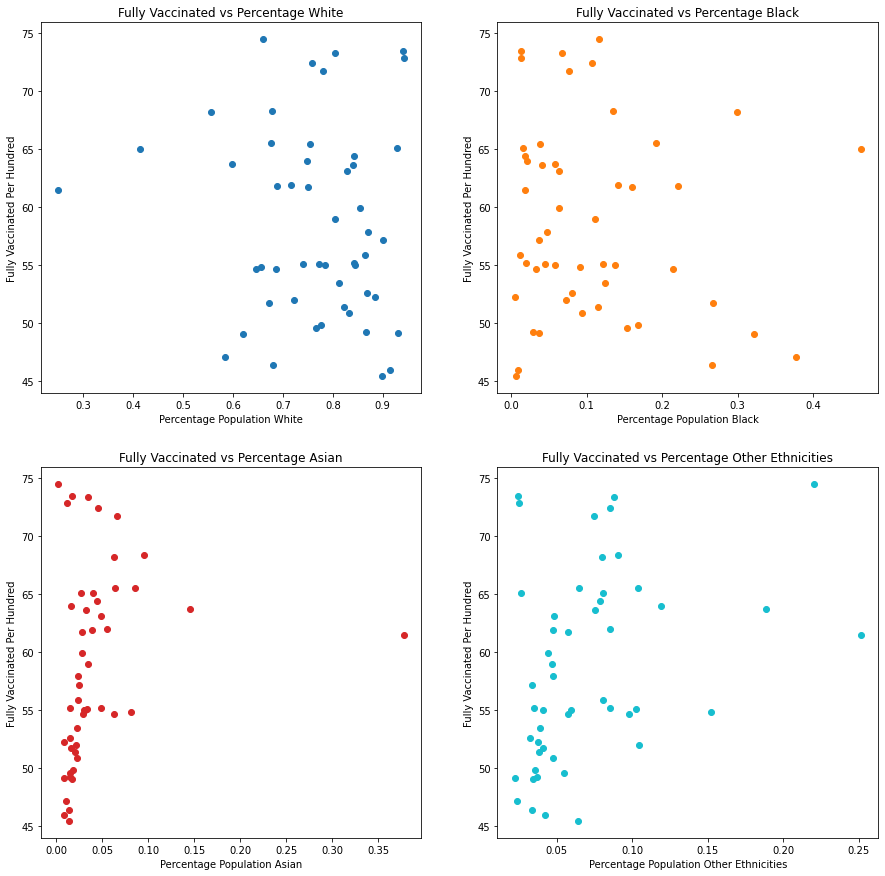

In [ ]:
plt.figure(figsize=[15,15])

plt.subplot(221)
plt.scatter(race_vacc["WhiteTotalPerc"], race_vacc["people_fully_vaccinated_per_hundred"], c="tab:blue")
plt.xlabel("Percentage Population White")
plt.ylabel("Fully Vaccinated Per Hundred")
plt.title("Fully Vaccinated vs Percentage White")

plt.subplot(222)
plt.scatter(race_vacc["BlackTotalPerc"], race_vacc["people_fully_vaccinated_per_hundred"], c="tab:orange")
plt.xlabel("Percentage Population Black")
plt.ylabel("Fully Vaccinated Per Hundred")
plt.title("Fully Vaccinated vs Percentage Black")

plt.subplot(223)
plt.scatter(race_vacc["AsianTotalPerc"], race_vacc["people_fully_vaccinated_per_hundred"], c="tab:red")
plt.xlabel("Percentage Population Asian")
plt.ylabel("Fully Vaccinated Per Hundred")
plt.title("Fully Vaccinated vs Percentage Asian")

plt.subplot(224)
plt.scatter(race_vacc["OtherTotalPerc"], race_vacc["people_fully_vaccinated_per_hundred"], c="tab:cyan")
plt.xlabel("Percentage Population Other Ethnicities")
plt.ylabel("Fully Vaccinated Per Hundred")
plt.title("Fully Vaccinated vs Percentage Other Ethnicities")

plt.show()

Of these given visualizations, none show a clear correlation between race and rate of vaccination. With a generally even spread of percentage fully vaccinated across the board. No clear conclusion can be drawn based on community influence regarding race. 

However, there strangely seems to exist a moderate correlation with percentage of Asian population and percentage of people fully vaccinated. The graph below more clearly demonstrates it, but there seems to be a slight positive correlation between the two factors. 

Text(0.5, 1.0, 'Full Vaccinated vs Percent Asian (no CA and HA)')

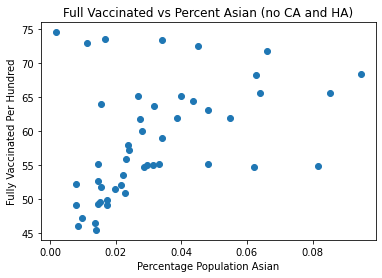

In [ ]:
plt.scatter(asian_vacc["AsianTotalPerc"], asian_vacc["people_fully_vaccinated_per_hundred"])
plt.xlabel("Percentage Population Asian")
plt.ylabel("Fully Vaccinated Per Hundred")
plt.title("Full Vaccinated vs Percent Asian (no CA and HA)")

In [ ]:
df_mask_usage_state.sort_values(by=['State'], inplace = True)
df_median_income = df_median_income.replace({r'\$':''}, regex = True)
df_median_income = df_median_income.replace({r'\,':''}, regex = True)
df_median_income.sort_values(by=['Median Annual Household Income'], inplace=True)
df_median_income =  df_median_income.iloc[1: , :]

In [ ]:
df_comparison_list = [df_median_income['Median Annual Household Income'], df_mask_usage_state['tot_cases_Oct']]
headers = ["Median Income", "October Cases"]
df_income_comparison = pd.concat(df_comparison_list, axis=1, keys=headers)
df_income_comparison.sort_values(by = ['Median Income'], inplace = True)

KeyError: ignored

NameError: ignored

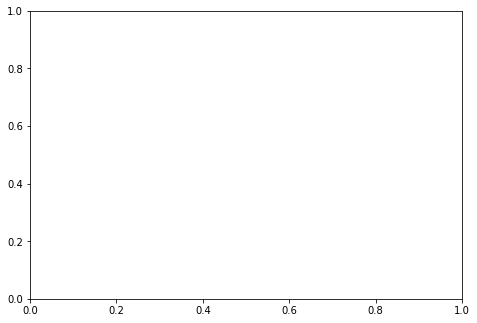

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.scatter(df_income_comparison['Median Income'],df_income_comparison['October Cases'])
x = [0, 25, 50]
plt.xticks(x)
plt.rcParams['font.size'] = '16'

The graph above suggests that median income does not create a sort of correlation between the number of cases or general safety. However, the size of states and general density in certain cities must be considered as well, which is not represented in this graph.

In [ ]:
state_education["STATE"] = state_education["STATE"].map(lambda x: x.upper())

In [ ]:
vacc_edu = pd.merge(state_vacc, state_education, on='STATE')

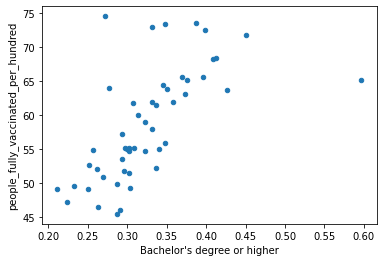

In [ ]:
vacc_edu.plot.scatter(x='Bachelor\'s degree or higher', y='people_fully_vaccinated_per_hundred')

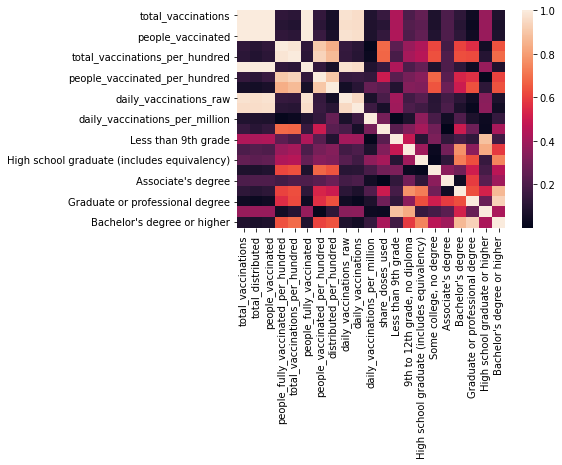

In [ ]:
sns.heatmap(vacc_edu.corr().abs())

In [ ]:
from data.education import state_education
from data.mask_usage import state_masks
from data.politics import state_parties
from data.vaccinations import state_vacc

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
state_parties["STATE"] = state_parties["STATE"].map(lambda x: x.upper())

In [ ]:
state_masks["STATE"] = state_masks["STATE"].map(lambda x: x.upper())

In [ ]:
print(state_masks.columns)

Index(['StateID', 'STATE', 'adh_AUGavg', 'adh_JULavg', 'adh_JUNEavg',
       'adh_MAYavg', 'adh_APRavg', 'Pop_2019', 'Hispanic', 'NHBlack',
       'NHWhite', 'Age', 'PopDensity', 'DistancePolicy', 'tot_Cases_Jul',
       'DistanceNone', 'DistanceStrict', 'DistCat', 'tot_cases_Apr',
       'tot_cases_May', 'tot_cases_Jun', 'tot_cases_Aug', 'tot_cases_Sep',
       'newCases_May', 'newCases_Jun', 'newCases_Jul', 'newCases_Aug',
       'newCases_Sep', 'case_rate_May', 'case_rate_Jun', 'case_rate_Jul',
       'case_rate_Aug', 'case_rate_Sep', 'EndStayHome', 'NoStayHomePolicy',
       'NoHomeMay', 'MaskPolStart', 'MaskJunPol', 'MaskJulPol', 'MaskAugPol',
       'MaskSepPol', 'MaskPolStop', 'tot_cases_Oct', 'newCases_Oct',
       'case_rate_Oct', 'AdhSEPavg', 'Wk_case_rate_Sep', 'Wk_case_rate_Oct',
       'Wk_case_rate_Aug', 'Wk_case_rate_Jul', 'Wk_case_rate_Jun',
       'Wk_case_rate_May', 'Wk_MayHI', 'Wk_JunHI', 'Wk_JulHI', 'Wk_AugHI',
       'Wk_SepHI', 'Wk_OctHI', 'maskGT75', 'maskSEP75',

In [ ]:
vacc_parties_masks = pd.merge(pd.merge(state_vacc, state_parties, on='STATE'), state_masks, on='STATE')

In [ ]:
state_vacc.head()

,date,STATE,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used
1,2021-01-13,ALABAMA,84040.0,378975.0,74792.0,0.19,1.71,9245.0,1.53,7.73,5906.0,5906.0,1205.0,0.222
3,2021-01-15,ALABAMA,100567.0,444650.0,86956.0,0.28,2.05,13488.0,1.77,9.07,8267.0,7478.0,1525.0,0.226
8,2021-01-20,ALABAMA,139200.0,483275.0,121113.0,0.37,2.84,17956.0,2.47,9.86,8405.0,7880.0,1607.0,0.288
9,2021-01-21,ALABAMA,165919.0,493125.0,144429.0,0.44,3.38,21345.0,2.95,10.06,26719.0,10517.0,2145.0,0.336
10,2021-01-22,ALABAMA,199314.0,519525.0,174317.0,0.51,4.06,24840.0,3.56,10.60,33395.0,14107.0,2877.0,0.384


In [ ]:
vacc_parties_masks_subset = vacc_parties_masks[['date', 'STATE', 'people_fully_vaccinated_per_hundred', 'Democrat/Lean Democrat', 'adh_AUGavg', 'PopDensity']]

In [ ]:
vacc_parties_masks = vacc_parties_masks.reindex(sorted(vacc_parties_masks.columns), axis=1)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


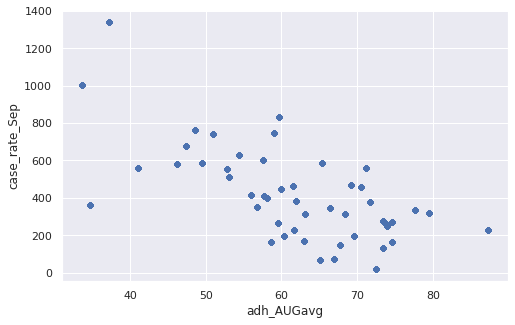

In [ ]:
sns.set(rc={'figure.figsize':(8, 5)})
vacc_parties_masks.plot.scatter(x='adh_AUGavg', y='case_rate_Sep')

The data above also shows high promise for adherance rate and decrease in cases. The higher the adherance rate per state, the lower the COVID rates were the following month. With such a correlation, this suggests that adhering and allowing the vaccine to be administered allows for a decrease in COVID infection rates.

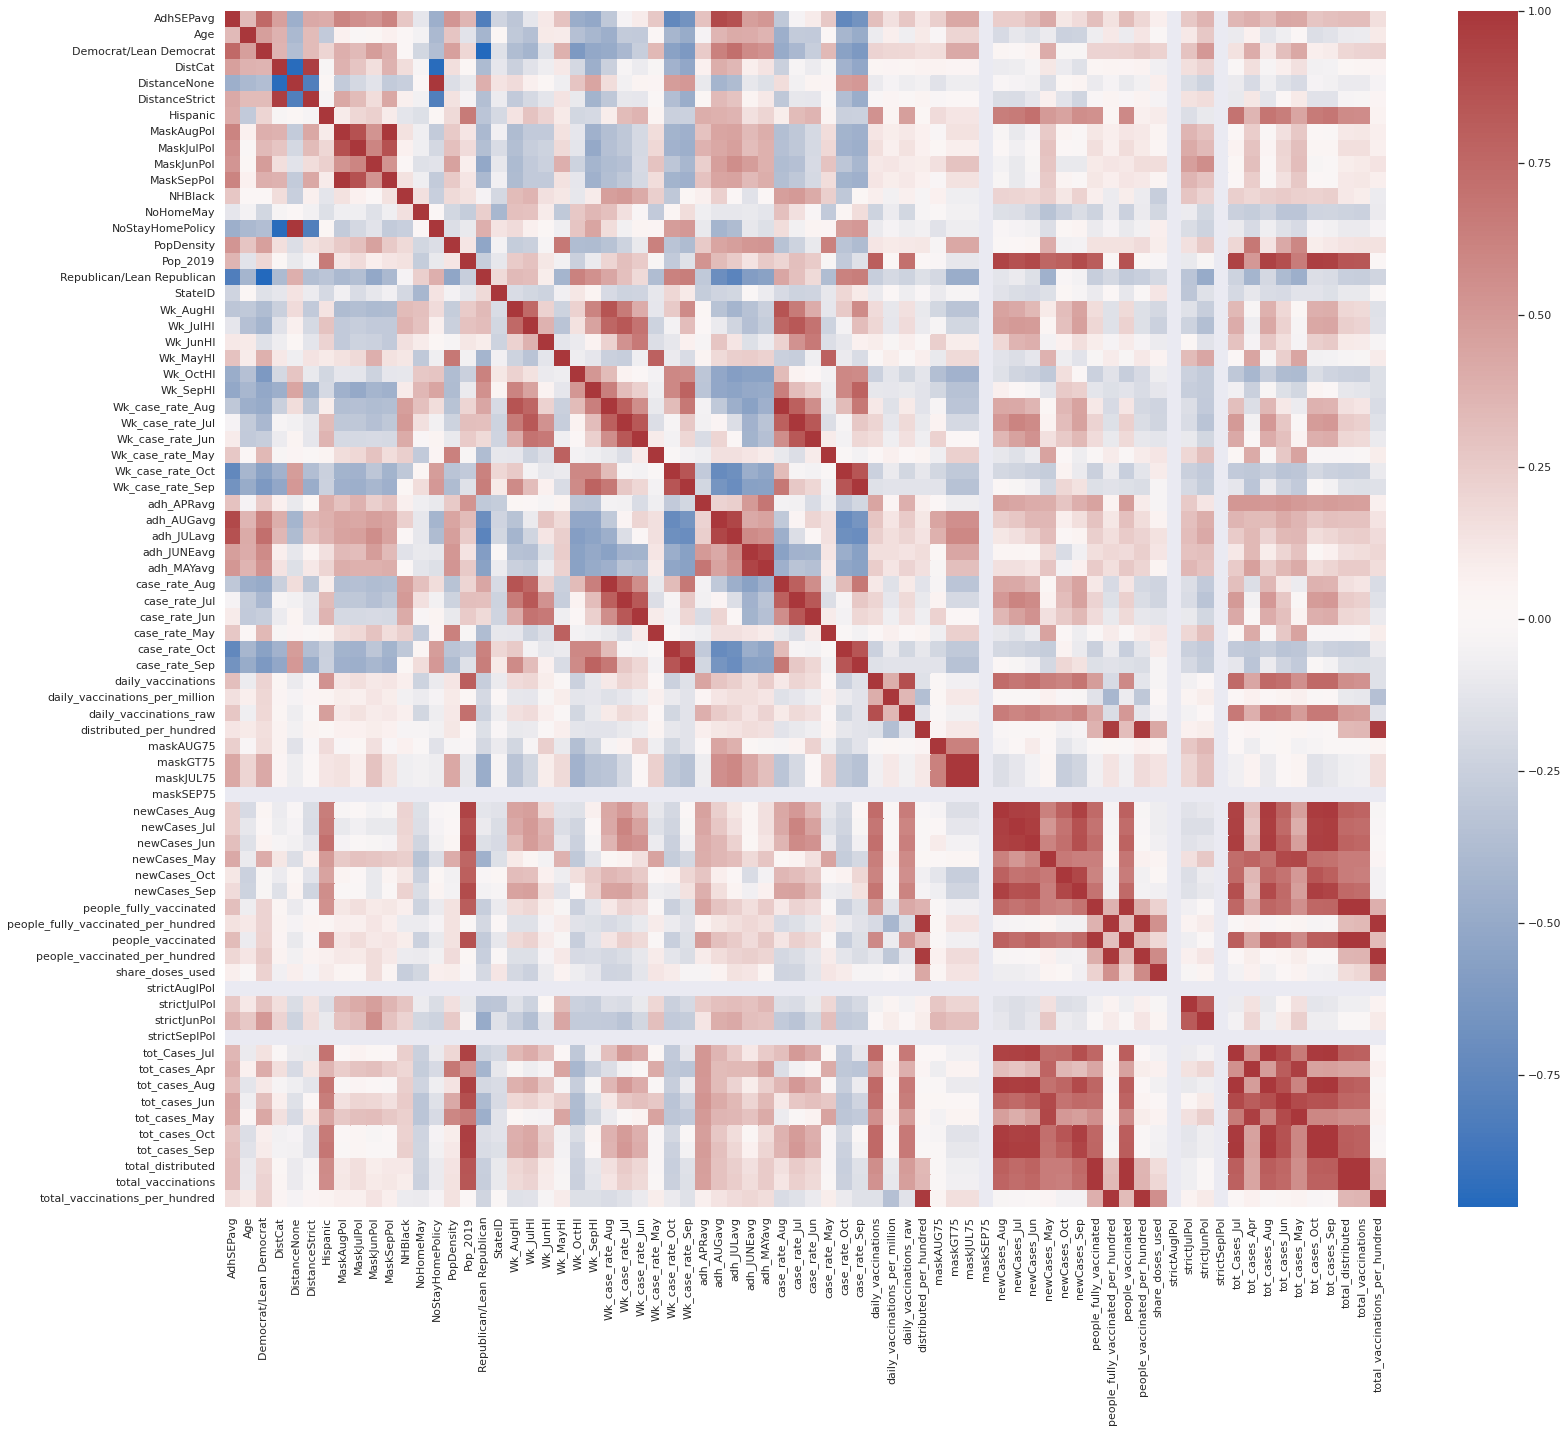

In [ ]:
sns.set(rc={'figure.figsize':(26, 22)})
sns.color_palette('viridis', as_cmap=True)
sns.heatmap(vacc_parties_masks.corr(), cmap = "vlag")

In [ ]:
df_median_income[df_median_income.columns[1:]] = df_median_income[df_median_income.columns[1:]].replace('[\$,]', '', regex=True).astype(float)


In [ ]:
df = pd.merge(state_education, state_median_income, on='STATE')

In [ ]:
df_final = pd.merge(vacc_parties_masks, df, on='STATE')
df_final.head()

,AdhSEPavg,Age,Democrat/Lean Democrat,DistCat,DistanceNone,DistancePolicy,DistanceStrict,EndStayHome,Hispanic,MaskAugPol,MaskJulPol,MaskJunPol,MaskPolStart,MaskPolStop,MaskSepPol,NHBlack,NHWhite,NoHomeMay,NoStayHomePolicy,PopDensity,Pop_2019,Republican/Lean Republican,STATE,StateID,Wk_AugHI,Wk_JulHI,Wk_JunHI,Wk_MayHI,Wk_OctHI,Wk_SepHI,Wk_case_rate_Aug,Wk_case_rate_Jul,Wk_case_rate_Jun,Wk_case_rate_May,Wk_case_rate_Oct,Wk_case_rate_Sep,adh_APRavg,adh_AUGavg,adh_JULavg,adh_JUNEavg,...,maskGT75,maskJUL75,maskSEP75,newCases_Aug,newCases_Jul,newCases_Jun,newCases_May,newCases_Oct,newCases_Sep,people_fully_vaccinated,people_fully_vaccinated_per_hundred,people_vaccinated,people_vaccinated_per_hundred,share_doses_used,strictAugPol,strictAuglPol,strictJulPol,strictJunPol,strictSepPol,strictSeplPol,tot_Cases_Jul,tot_cases_Apr,tot_cases_Aug,tot_cases_Jun,tot_cases_May,tot_cases_Oct,tot_cases_Sep,total_distributed,total_vaccinations,total_vaccinations_per_hundred,Less than 9th grade,"9th to 12th grade, no diploma",High school graduate (includes equivalency),"Some college, no degree",Associate's degree,Bachelor's degree,Graduate or professional degree,High school graduate or higher,Bachelor's degree or higher,Median Annual Household Income
0,59.83,39.3,35.0,3,0,Recommen,1,4/30/2020,4.1,1,1,0,7/16/2020,0,1,26.7,65.5,1,0,94.4,4903185,52.0,ALABAMA,1,1,1,0,0,1,1,354.046308,461.694333,183.730297,101.409038,348.419168,265.532413,24.67,65.354839,62.677419,27.6,...,0,0,0,38191,49803,19819,10939,37584,28643,9245.0,0.19,74792.0,1.53,0.222,,0,0,0,,0,87867,7306,126058,38064,18245,192285,154701,378975.0,84040.0,1.71,0.039,0.09,0.309,0.208,0.09,0.163,0.1,0.871,0.263,51734
1,59.83,39.3,35.0,3,0,Recommen,1,4/30/2020,4.1,1,1,0,7/16/2020,0,1,26.7,65.5,1,0,94.4,4903185,52.0,ALABAMA,1,1,1,0,0,1,1,354.046308,461.694333,183.730297,101.409038,348.419168,265.532413,24.67,65.354839,62.677419,27.6,...,0,0,0,38191,49803,19819,10939,37584,28643,13488.0,0.28,86956.0,1.77,0.226,,0,0,0,,0,87867,7306,126058,38064,18245,192285,154701,444650.0,100567.0,2.05,0.039,0.09,0.309,0.208,0.09,0.163,0.1,0.871,0.263,51734
2,59.83,39.3,35.0,3,0,Recommen,1,4/30/2020,4.1,1,1,0,7/16/2020,0,1,26.7,65.5,1,0,94.4,4903185,52.0,ALABAMA,1,1,1,0,0,1,1,354.046308,461.694333,183.730297,101.409038,348.419168,265.532413,24.67,65.354839,62.677419,27.6,...,0,0,0,38191,49803,19819,10939,37584,28643,17956.0,0.37,121113.0,2.47,0.288,,0,0,0,,0,87867,7306,126058,38064,18245,192285,154701,483275.0,139200.0,2.84,0.039,0.09,0.309,0.208,0.09,0.163,0.1,0.871,0.263,51734
3,59.83,39.3,35.0,3,0,Recommen,1,4/30/2020,4.1,1,1,0,7/16/2020,0,1,26.7,65.5,1,0,94.4,4903185,52.0,ALABAMA,1,1,1,0,0,1,1,354.046308,461.694333,183.730297,101.409038,348.419168,265.532413,24.67,65.354839,62.677419,27.6,...,0,0,0,38191,49803,19819,10939,37584,28643,21345.0,0.44,144429.0,2.95,0.336,,0,0,0,,0,87867,7306,126058,38064,18245,192285,154701,493125.0,165919.0,3.38,0.039,0.09,0.309,0.208,0.09,0.163,0.1,0.871,0.263,51734
4,59.83,39.3,35.0,3,0,Recommen,1,4/30/2020,4.1,1,1,0,7/16/2020,0,1,26.7,65.5,1,0,94.4,4903185,52.0,ALABAMA,1,1,1,0,0,1,1,354.046308,461.694333,183.730297,101.409038,348.419168,265.532413,24.67,65.354839,62.677419,27.6,...,0,0,0,38191,49803,19819,10939,37584,28643,24840.0,0.51,174317.0,3.56,0.384,,0,0,0,,0,87867,7306,126058,38064,18245,192285,154701,519525.0,199314.0,4.06,0.039,0.09,0.309,0.208,0.09,0.163,0.1,0.871,0.263,51734


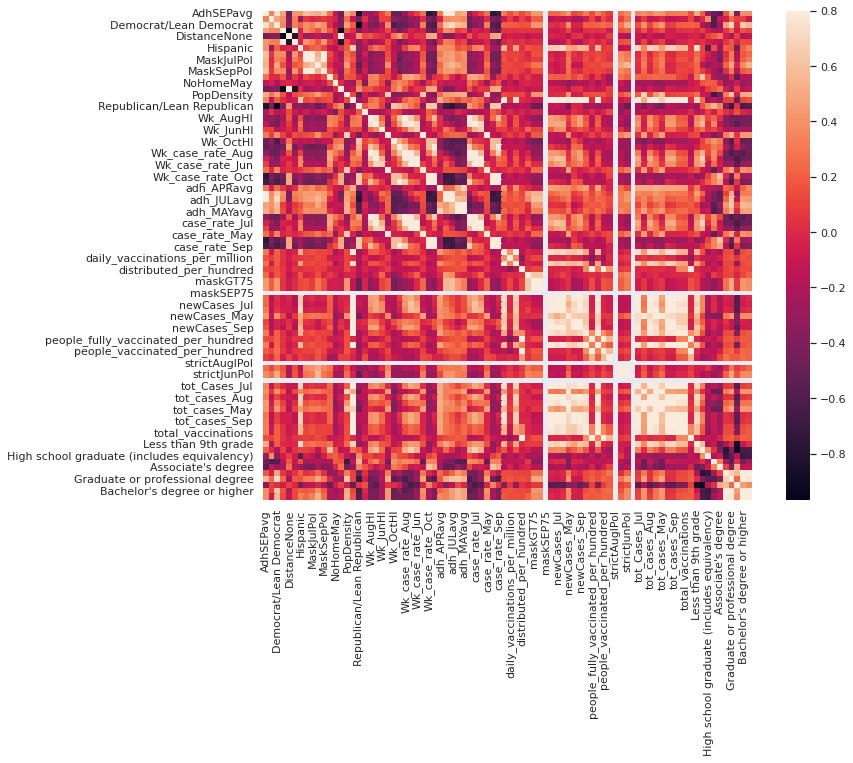

In [ ]:
corrmat = df_final.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [ ]:
vacc_drop = ['total_vaccinations', 'total_distributed',
       'people_vaccinated', 'people_fully_vaccinated_per_hundred',
       'total_vaccinations_per_hundred', 'people_fully_vaccinated',
       'distributed_per_hundred',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'daily_vaccinations_per_million', 'share_doses_used']
#df_final.drop(vacc_drop, axis=1, inplace=True)

In [ ]:
df_no_masks = pd.merge(df, state_parties, on = "STATE")
df_no_masks = pd.merge(df_no_masks, state_vacc[["people_vaccinated_per_hundred", "STATE"]], on = "STATE")
df_no_masks = pd.merge(df_no_masks, state_median_income, on="STATE")

(13610, 15)

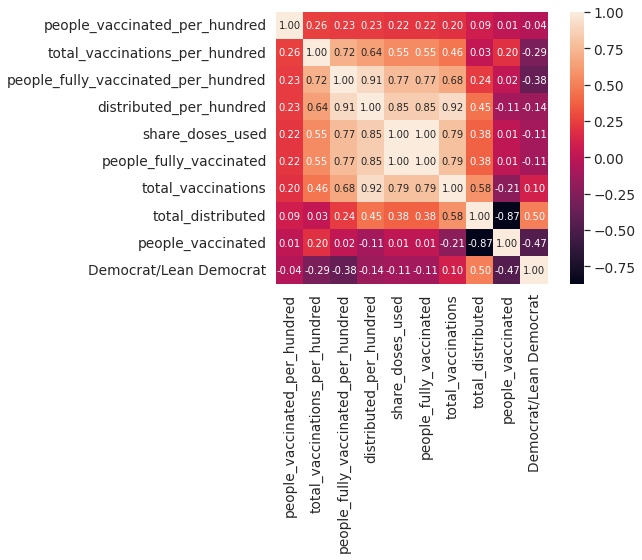

In [ ]:
#new correlation matrix of 10 highest correlations to vaccination status (doesn't consider strong negative correlations)
corr_no_masks = df_no_masks.corr()
k = 10 #number of variables for heatmap
new_cols = corr_no_masks.nlargest(k, 'people_vaccinated_per_hundred')['people_vaccinated_per_hundred'].index
cm_no_masks = np.corrcoef(df_no_masks[new_cols].values.T)
sns.set(font_scale=1.25)
hm_no_masks = sns.heatmap(cm_no_masks, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
link_race_ethnicity = "https://github.com/Casper-Guo/MDST-Covid-Vaccination/blob/main/percent_vaccinated_race_ethnicity.xlsx?raw=true"
df_race_ethnicity = pd.read_excel(link_race_ethnicity)

del df_race_ethnicity["Unnamed: 7"]
del df_race_ethnicity["Unnamed: 8"]
del df_race_ethnicity["Unnamed: 9"]
del df_race_ethnicity["Unnamed: 10"]
del df_race_ethnicity["Link"]
del df_race_ethnicity["Date"]

df_race_ethnicity.rename(columns={"State": "STATE"}, inplace=True)

df_race_ethnicity.drop(axis=0, index=range(49,54), inplace=True)
df_race_ethnicity.drop(axis=0, index=25, inplace=True)
df_race_ethnicity["STATE"] = df_race_ethnicity["STATE"].map(lambda x: x.upper())

pd.set_option("display.max.columns", None)

#what you've done and the motivation for it 

In [ ]:
states_abbreviations = {"ALABAMA":"AL",
             "ALASKA":"AK",
             "ARIZONA":"AZ",
             "ARKANSAS":"AR",
             "CALIFORNIA":"CA",
             "COLORADO":"CO",
             "CONNECTICUT":"CT",
             "DELAWARE":"DE",
             "FLORIDA":"FL*",
             "GEORGIA":"GA",
             "HAWAII":"HI",
             "IDAHO":"ID",
             "ILLINOIS":"IL",
             "INDIANA":"IN",
             "IOWA":"IA",
             "KANSAS":"KS",
             "KENTUCKY":"KY*",
             "LOUISANA":"LA",
             "MAINE":"ME*",
             "MARYLAND":"MD",
             "MASSECHUESETTS":"MA",
             "MICHIGAN":"MI",
             "MINNESOTA":"MN",
             "MISSISSIPPI":"MS",
             "MISSOURI":"MO",
             "MONTANA":"MT",
             "NEBRASKA":"NE",
             "NEVADA":"NV",
             "NEW HAMPSHIRE":"NH",
             "NEW JERSEY":"NJ",
             "NEW MEXICO":"NM",
             "NEW YORK":"NY",
             "NORTH CAROLINA":"NC",
             "NORTH DAKOTA":"ND",
             "OHIO":"OH",
             "OKLAHOMA":"OK",
             "OREGON":"OR",
             "PENNSYLVANIA":"PA",
             "RHODE ISLAND":"RI",
             "SOUTH CAROLINA":"SC*",
             "SOUTH DAKOTA":"SD",
             "TENNESSEE":"TN",
             "TEXAS":"TX",
             "UTAH":"UT",
             "VERMONT":"VT",
             "VIRGINIA":"VA",
             "WASHINGTON":"WA",
             "WEST VIRGINIA":"WV*",
             "WISCONSIN":"WI",
             "WYOMING":"WY"}

print(len(states_abbreviations))

In [ ]:
df_race_ethnicity["Percent Vaccinated, Hispanic"] = df_race_ethnicity["Percent Vaccinated, Hispanic"].fillna(value = 0)
df_race_ethnicity["Percent Vaccinated, Asian"] = df_race_ethnicity["Percent Vaccinated, Hispanic"].fillna(value = 0)

df_race_ethnicity["Percent Vaccinated, White"] *= 100
df_race_ethnicity["Percent Vaccinated, Black"] *= 100
df_race_ethnicity["Percent Vaccinated, Hispanic"] *= 100
df_race_ethnicity["Percent Vaccinated, Asian"] *= 100

abbreviations = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL*', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY*', 'LA', 'ME*', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC*', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV*', 'WI' ]
df_race_ethnicity['Abb'] = abbreviations

print(df_race_ethnicity)

x = df_race_ethnicity["Abb"]
y1 = df_race_ethnicity["Percent Vaccinated, White"]
y2 = df_race_ethnicity["Percent Vaccinated, Black"]
y3 = df_race_ethnicity["Percent Vaccinated, Hispanic"]
y4 = df_race_ethnicity["Percent Vaccinated, Asian"]

plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.bar(x, y3, bottom=y1+y2, color='y')
plt.bar(x, y4, bottom=y1+y2+y3, color='g')

plt.xlabel("STATE")
plt.ylabel("Percent Vaccinated")
plt.legend(["White", "Black", "Hispanic", "Asian"])
plt.title("Percent Vaccinated by Race/Ethnicity")

plt.rcParams["figure.figsize"] = (15,8)

plt.show()

NameError: ignored

In [ ]:
!git clone https://github.com/Casper-Guo/MDST-Covid-Vaccination.git repo 

from repo.data.vaccinations import state_vacc
from repo.data.medianIncome import state_median_income

print(state_vacc.columns)
print(state_median_income.columns)

state_median_income = state_median_income.reset_index()
del state_median_income['index']

pd.set_option("display.max_rows", None, "display.max_columns", None)
print(state_median_income)


newstatevacc = state_vacc[state_vacc.date == max(state_vacc.date)]
newstatevacc.drop('total_vaccinations', inplace=True, axis=1)
newstatevacc.drop('total_distributed', inplace=True, axis=1)
newstatevacc.drop('people_vaccinated', inplace=True, axis=1)
newstatevacc.drop('total_vaccinations_per_hundred', inplace=True, axis=1)
newstatevacc.drop('people_fully_vaccinated', inplace=True, axis=1)
newstatevacc.drop('people_vaccinated_per_hundred', inplace=True, axis=1)
newstatevacc.drop('distributed_per_hundred', inplace=True, axis=1)
newstatevacc.drop('daily_vaccinations_raw', inplace=True, axis=1)
newstatevacc.drop('daily_vaccinations', inplace=True, axis=1)
newstatevacc.drop('daily_vaccinations_per_million', inplace=True, axis=1)
newstatevacc.drop('share_doses_used', inplace=True, axis=1)

newstatevacc.drop(axis=0, index=908, inplace=True)
newstatevacc.drop(axis=0, index=3618, inplace=True)
newstatevacc.drop(axis=0, index=3919, inplace=True)
newstatevacc.drop(axis=0, index=4828, inplace=True)
newstatevacc.drop(axis=0, index=5975, inplace=True)
newstatevacc.drop(axis=0, index=8300, inplace=True)
newstatevacc.drop(axis=0, index=13044, inplace=True)
newstatevacc.drop(axis=0, index=14568, inplace=True)
newstatevacc.drop(axis=0, index=14861, inplace=True)
newstatevacc.drop(axis=0, index=16691, inplace=True)
newstatevacc.drop(axis=0, index=17867, inplace=True)

abbreviations = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY' ]
newstatevacc['Abb'] = abbreviations

pd.set_option("display.max_rows", None, "display.max_columns", None)
print(newstatevacc)

In [ ]:
newstatevacc = newstatevacc.reset_index()
del newstatevacc['index']

newstatevacc['Median Annual Household Income'] = state_median_income['Median Annual Household Income']

y = newstatevacc["people_fully_vaccinated_per_hundred"]
x = newstatevacc['Median Annual Household Income'] 
n = newstatevacc['Abb'] 

plt.scatter(x, y)
for i, txt in enumerate(n):
    plt.annotate(txt, (x[i], y[i]), fontsize=15)

plt.xlabel("Median Annual Household Income")
plt.ylabel("Number of People Fully Vaccinated Per Hundred People")
plt.legend(["STATE"])
plt.title("Number of People Fully Vaccinated Per Hundred People By Median Annual Household Income Per State")

plt.rcParams["figure.figsize"] = (15,8)
plt.show  